<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

# **Artificial Intelligence - MSc**

## CS6512 - AI & Data Science Ecosystems - Theory and Practice 
## SEM2 2022/3

### CS6512 Etivity 2 - Implementing a Layer Detector for Cryptocurrency Rates with AWS

### Instructor: Emil Vassev
April 20th, 2023
<br><br>
Copyright (C) 2023 - All rights reserved, do not copy or distribute without permission of the author.
***

## Submission Info
### Student Name: Zhen
### Student Surname: Wang
### Student ID: 19327455
### Date of Final Submission: 08/05/2023

## Task
In this e-tivity, you will be granted with access to an AWS Academy Learner Lab, and asked to:
<ol>
<li>Follow the provided instructions to set up your AWS environment.</li>
<li>Implement an Outlier Detector for cryptocurrency rates by using the outlier-detection algorithms covered in class:
<ul>
<li>Enhanced Dixon Q</li>
<li>Mean & Standard Deviation</li>
<li>Isolation Forest</li>
<li>Boxplots Method</li>
<li>DBSCAN Clustering Method</li>
</ul></li>    
</ol>

Your outlier detector shall be implemented in Python and run on AWS SageMaker. 

### Implementation Subtasks
This e-tivity has two distinct subtasks:
<ol>
    <li>Detecting outliers among cryptocurrency history rates</li>
    <li>Detecting outliers among cryptocurrency live-exchange rates</li>
</ol>    

### Subtask #1: Detecting outliers among cryptocurrency history rates
<ol>
<li>Use the AWS SageMaker to open a Jupyter Notebook and implement your assignment there.</li> 
<li>Set up an S3 bucket, upload the **instrument_price.csv** file and use the provided interface to read from and write to this and othere files there.</li> 
<li>Implement an outlier detector that runs on the AWS SageMaker and:
  <ul>
    <li>loads csv data from the AWS S3 storage space and produces an outlier report</li>
    <li>gets hystory rates from the marketplace CryptoCompare.com and produces an outlier report</li>
  </ul>
</li>
</ol>

### Subtask #2: Detecting outliers among cryptocurrency live-exchange rates
<ol>
<li>Implement a new feature of your Outlier Detector, so it will:
  <ol>
    <li>Get live-exchange cryptocurrency rates from the marketplace CryptoCompare.com on every 30 sec.</li>
    <li>Store these cryptocurrency rates.</li>
    <li>Detect outliers among these cryptocurrency rates.</li>
  </ol>
</li>
</ol>


## Note 
<span style="color:blue">You will be provided with:</span> 
  <ul>
    <li><span style="color:blue">implementation of the outlier-detection algorithms:</span>
      <ul>  
       <li>class DixonQEnhanced</li>
       <li>class StandardDeviationMethod</li>
       <li>class IsolationForestMethod</li>
       <li>class BoxPlotsMethod</li>
       <li>class DBScanClusteringMethod</li>
      </ul>    
    </li>
    <li><span style="color:blue">implementation of reading live-exchange rates from CryptoCompare.com:</span>
      <ul>  
       <li>class CryptoCompareReader</li>
      </ul>  
    </li>
    <li><span style="color:blue">a library making the communication with the s3 bucket transparent:</span>
      <ul>  
       <li>class S3Utils</li>
      </ul>  
    </li>
    <li><span style="color:blue">implementation of the structure of your code (class and methods) - you will need to follow this structure:</span>
      <ul>  
       <li>class CS6512Assignment2</li>
      </ul> 
    </li> 
  </ul>    

## Implementation 

### Libraries to Use

#### Method #1: Dixon Q Test

In [1]:
"""
Enhanced Dixon Q Test

@author: Emil Vassev
"""

from scipy.stats import shapiro

"""
 *
 * This class implements an enhanced version of DixonQ Test.
 * Provides a set of encoded critical values - up to 100.
 * The encoded critical values are used as a basis to generate critical values for other alphas (levels of confidence).
 * Both encoded and generated critical values are used to produce a result of maximum accuracy when identifying outliers. 
 *  
""" 
class DixonQEnhanced:
    
    criticalValues = {}


    """
     * DixonQEnhanced constructor
    """ 
    def __init__(self):
        self.buildCriticalValues()


    """
     * Builds a dictionary of critical values grouped by alpha  
    """
    def buildCriticalValues(self):
        
        """
         * the critical values are grouped by an alpha key
         * alpha is the probability of incorrectly rejecting the suspected outlier
        """    
        #encoded critical values for alpha = 0.3 (0.7% level of confidence)
        self.criticalValues[0.30] = [0,0,
                                     0.6836,0.4704,0.3730,0.3173,0.2811,0.2550,0.2361,0.2208,
                                     0.2086,0.1983,0.1898,0.1826,0.1764,0.1707,0.1656,0.1613,
                                     0.1572,0.1535,0.1504,0.1474,0.1446,0.1420,0.1397,0.1376,
                                     0.1355,0.1335,0.1318,0.1300,0.1283,0.1268,0.1255,0.1240,
                                     0.1227,0.1215,0.1202,0.1192,0.1181,0.1169,0.1160,0.1153,
                                     0.1141,0.1134,0.1124,0.1116,0.1108,0.1102,0.1093,0.1087,
                                     0.1079,0.1071,0.1067,0.1060,0.1052,0.1047,0.1041,0.1036,
                                     0.1030,0.1024,0.1019,0.1014,0.1009,0.1004,0.1000,0.0997,
                                     0.0991,0.0987,0.0982,0.0979,0.0974,0.0970,0.0967,0.0961,
                                     0.0960,0.0955,0.0952,0.0948,0.0943,0.0939,0.0937,0.0935,
                                     0.0930,0.0928,0.0925,0.0921,0.0918,0.0915,0.0913,0.0910,
                                     0.0906,0.0903,0.0902,0.0899,0.0896,0.0894,0.0892,0.0890,
                                     0.0887,0.0885]
        
        #encoded critical values for alpha = 0.2 (0.8% level of confidence)
        self.criticalValues[0.20] = [0,0,
                                     0.7808,0.5603,0.4508,0.3868,0.3444,0.3138,0.2915,0.2735,
                                     0.2586,0.2467,0.2366,0.2280,0.2202,0.2137,0.2077,0.2023,
                                     0.1973,0.1929,0.1890,0.1854,0.1820,0.1790,0.1761,0.1735,
                                     0.1710,0.1687,0.1664,0.1645,0.1624,0.1604,0.1590,0.1571,
                                     0.1555,0.1540,0.1525,0.1512,0.1499,0.1484,0.1472,0.1462,
                                     0.1449,0.1441,0.1430,0.1418,0.1408,0.1400,0.1390,0.1381,
                                     0.1374,0.1365,0.1357,0.1349,0.1340,0.1334,0.1326,0.1320,
                                     0.1312,0.1304,0.1299,0.1294,0.1286,0.1281,0.1275,0.1272,
                                     0.1264,0.1260,0.1254,0.1249,0.1243,0.1238,0.1234,0.1228,
                                     0.1225,0.1221,0.1217,0.1212,0.1205,0.1201,0.1198,0.1195,
                                     0.1189,0.1187,0.1182,0.1178,0.1174,0.1171,0.1167,0.1165,
                                     0.1160,0.1156,0.1154,0.1151,0.1147,0.1144,0.1141,0.1138,
                                     0.1134,0.1131]        

        #encoded critical values for alpha = 0.1 (0.9% level of confidence)
        self.criticalValues[0.10] = [0,0,
                                     0.8850,0.6789,0.5578,0.4840,0.4340,0.3979,0.3704,0.3492,
                                     0.3312,0.3170,0.3045,0.2938,0.2848,0.2765,0.2691,0.2626,
                                     0.2564,0.2511,0.2460,0.2415,0.2377,0.2337,0.2303,0.2269,
                                     0.2237,0.2208,0.2182,0.2155,0.2132,0.2110,0.2088,0.2066,
                                     0.2045,0.2026,0.2008,0.1993,0.1974,0.1958,0.1944,0.1930,
                                     0.1915,0.1902,0.1890,0.1875,0.1865,0.1850,0.1839,0.1829,
                                     0.1819,0.1808,0.1797,0.1788,0.1777,0.1768,0.1759,0.1752,
                                     0.1741,0.1733,0.1726,0.1717,0.1707,0.1703,0.1694,0.1689,
                                     0.1679,0.1674,0.1667,0.1660,0.1652,0.1648,0.1641,0.1635,
                                     0.1631,0.1626,0.1620,0.1613,0.1605,0.1601,0.1596,0.1594,
                                     0.1586,0.1583,0.1576,0.1573,0.1567,0.1563,0.1557,0.1554,
                                     0.1547,0.1544,0.1540,0.1537,0.1532,0.1528,0.1524,0.1521,
                                     0.1516,0.1512]        

        #encoded critical values for alpha = 0.05 (0.95% level of confidence)
        self.criticalValues[0.05] = [0,0,
                                     0.9411,0.7651,0.6423,0.5624,0.5077,0.4673,0.4363,0.4122,
                                     0.3922,0.3755,0.3615,0.3496,0.3389,0.3293,0.3208,0.3135,
                                     0.3068,0.3005,0.2947,0.2895,0.2851,0.2804,0.2763,0.2725,
                                     0.2686,0.2655,0.2622,0.2594,0.2567,0.2541,0.2513,0.2488,
                                     0.2467,0.2445,0.2423,0.2408,0.2383,0.2366,0.2350,0.2334,
                                     0.2319,0.2302,0.2288,0.2273,0.2257,0.2241,0.2228,0.2216,
                                     0.2206,0.2191,0.2182,0.2169,0.2160,0.2145,0.2135,0.2126,
                                     0.2116,0.2106,0.2095,0.2085,0.2075,0.2070,0.2057,0.2053,
                                     0.2045,0.2037,0.2030,0.2020,0.2013,0.2005,0.1996,0.1990,
                                     0.1984,0.1980,0.1973,0.1964,0.1955,0.1950,0.1943,0.1940,
                                     0.1934,0.1927,0.1922,0.1918,0.1909,0.1906,0.1899,0.1896,
                                     0.1887,0.1885,0.1881,0.1876,0.1869,0.1865,0.1860,0.1856,
                                     0.1851,0.1846]        

        #encoded critical values for alpha = 0.02 (0.98% level of confidence)
        self.criticalValues[0.02] = [0,0,
                                     0.9763,0.8457,0.7291,0.6458,0.5864,0.5432,0.5091,0.4813,
                                     0.4591,0.4405,0.4250,0.4118,0.3991,0.3883,0.3792,0.3711,
                                     0.3630,0.3562,0.3495,0.3439,0.3384,0.3328,0.3287,0.3242,
                                     0.3202,0.3163,0.3127,0.3093,0.3060,0.3036,0.2999,0.2973,
                                     0.2948,0.2921,0.2898,0.2879,0.2853,0.2836,0.2815,0.2794,
                                     0.2778,0.2758,0.2744,0.2726,0.2711,0.2690,0.2676,0.2662,
                                     0.2651,0.2632,0.2620,0.2606,0.2595,0.2582,0.2570,0.2555,
                                     0.2545,0.2531,0.2522,0.2510,0.2500,0.2493,0.2480,0.2472,
                                     0.2466,0.2457,0.2445,0.2436,0.2429,0.2420,0.2409,0.2402,
                                     0.2398,0.2387,0.2382,0.2372,0.2365,0.2360,0.2349,0.2345,
                                     0.2337,0.2330,0.2322,0.2319,0.2309,0.2304,0.2298,0.2294,
                                     0.2285,0.2279,0.2272,0.2272,0.2259,0.2257,0.2251,0.2247,
                                     0.2240,0.2234]        

        #encoded critical values for alpha = 0.01 (0.99% level of confidence)
        self.criticalValues[0.01] = [0,0,
                                     0.9881,0.8886,0.7819,0.6987,0.6371,0.5914,0.5554,0.5260,
                                     0.5028,0.4831,0.4664,0.4517,0.4385,0.4268,0.4166,0.4081,
                                     0.4002,0.3922,0.3854,0.3789,0.3740,0.3674,0.3625,0.3583,
                                     0.3543,0.3499,0.3460,0.3425,0.3390,0.3357,0.3323,0.3294,
                                     0.3266,0.3238,0.3213,0.3187,0.3163,0.3141,0.3124,0.3102,
                                     0.3081,0.3061,0.3050,0.3028,0.3009,0.2991,0.2972,0.2960,
                                     0.2941,0.2927,0.2920,0.2899,0.2880,0.2873,0.2859,0.2845,
                                     0.2828,0.2816,0.2812,0.2792,0.2784,0.2775,0.2766,0.2754,
                                     0.2742,0.2735,0.2724,0.2714,0.2709,0.2696,0.2682,0.2677,
                                     0.2667,0.2662,0.2656,0.2646,0.2637,0.2633,0.2621,0.2614,
                                     0.2608,0.2599,0.2588,0.2584,0.2573,0.2568,0.2566,0.2558,
                                     0.2548,0.2543,0.2539,0.2535,0.2524,0.2521,0.2512,0.2513,
                                     0.2499,0.2498]   
        
        #encoded critical values for alpha = 0.005 (0.995% level of confidence)
        self.criticalValues[0.005] = [0,0,
                                     0.9940,0.9201,0.8234,0.7437,0.6809,0.6336,0.5952,0.5668,
                                     0.5416,0.5208,0.5034,0.4869,0.4739,0.4614,0.4504,0.4423,
                                     0.4333,0.4247,0.4173,0.4109,0.4051,0.3986,0.3935,0.3889,
                                     0.3843,0.3801,0.3762,0.3718,0.3685,0.3646,0.3610,0.3583,
                                     0.3548,0.3522,0.3498,0.3465,0.3443,0.3415,0.3400,0.3377,
                                     0.3353,0.3332,0.3325,0.3298,0.3279,0.3256,0.3235,0.3225,
                                     0.3204,0.3191,0.3177,0.3163,0.3140,0.3136,0.3118,0.3098,
                                     0.3089,0.3075,0.3071,0.3061,0.3041,0.3031,0.3025,0.3006,
                                     0.2996,0.2990,0.2983,0.2968,0.2959,0.2946,0.2934,0.2932,
                                     0.2922,0.2912,0.2905,0.2897,0.2885,0.2876,0.2870,0.2859,
                                     0.2852,0.2844,0.2836,0.2832,0.2818,0.2811,0.2808,0.2798,
                                     0.2790,0.2788,0.2784,0.2775,0.2766,0.2764,0.2755,0.2751,
                                     0.2738,0.2737]   

        """
         * Generates all critical values by using the encoded values as a basis.
         * Values are genereated between any two existing pairs of alphas.
        """ 
        #generate range alpha 0.2 - 0.1
        self.generateCriticalValuesForAlphaPair(0.2,0.1)

        #generate range alpha 0.3 - 0.2
        self.generateCriticalValuesForAlphaPair(0.3,0.2)

        #generate range alpha 0.10 - 0.05
        self.generateCriticalValuesForAlphaPair(0.10,0.05)

        #generate range alpha 0.05 - 0.02
        self.generateCriticalValuesForAlphaPair(0.05,0.02)
        
        
    """
     * Generates the missing series of critical values between two alphas with a step = 0.01
     * constraint: alpha1 > alpha2
    """ 
    def generateCriticalValuesForAlphaPair(self, alpha1, alpha2):
        
        if alpha1 < alpha2:
            raise Exception('The value of alpha1 is less than alpha2.')
            
        nInsideAlphas = int(round((alpha1 - alpha2)/(0.01)) - 1)
        
        insideAlphas = []
        
        step = 0.01
        for i in range(1,nInsideAlphas+1):
            newAlpha = round(alpha2 + i*step,2)
            insideAlphas.append(newAlpha) 
        
        for index in range(2,100):

            rangeLeft = self.criticalValues[alpha1][index]
            rangeRight = self.criticalValues[alpha2][index]
        
            distance = round(((rangeRight - rangeLeft)/(nInsideAlphas+1)),4)
            
            currentValue = self.criticalValues[alpha1][index]
            
            for insideAlpha in insideAlphas:
                
                if insideAlpha not in self.criticalValues.keys():
                    self.criticalValues[insideAlpha] = []
                    self.criticalValues[insideAlpha].append(0)
                    self.criticalValues[insideAlpha].append(0)
                
                currentValue += distance
                
                currentValue = round(currentValue,4)
                
                self.criticalValues[insideAlpha].append(currentValue)      
                
    """
     * Finds the next element in a series of elements
    """
    def findNextInSeries(self, number, series):
        
        result = -1
        
        try:
            index = series.index(number)
        except ValueError as e:
            raise Exception('The number has not been found in the series.')

        if index == (len(series) - 1):
            result = index - 1
        else:
            result = index + 1

        return result

        
    """
     * Finds the previous element in a series of elements
    """
    def findPreviousInSeries(self, number, series):
        
        result = -1
        
        try:
            index = series.index(number)
        except ValueError as e:
            raise Exception('The number has not been found in the series.')

        if index == 0:
            result = index + 1
        else:
            result = index - 1

        return result

        
    """
     * Identifies if a number is outlier within a series and for particular alpha
    """
    def isOutlier(self, number, series, alpha):
                
        qCritical = 0.0
        
        qExpDivisor = series[len(series)-1] - series[0]
        
        if qExpDivisor == 0:
            return False
        
        if len(series) > 100:
            return False

        nextNumberGap = abs(number - series[self.findNextInSeries(number,series)])
        prevNumberGap = abs(number - series[self.findPreviousInSeries(number,series)])
        if prevNumberGap < nextNumberGap:
            closestNumberGap = prevNumberGap
        else:
            closestNumberGap = nextNumberGap
            
        qExp = closestNumberGap/qExpDivisor
        
        if alpha in self.criticalValues.keys():
            qCritical = self.criticalValues[alpha][len(series)-1]
            
        if qExp > qCritical:
            return True
        else:
            return False
        

    """
     * Identifies all the outliers within a series
     * Uses the isOutlier method
    """
    def findOutliers(self, series):
        
        outliers = {}
        
        for alpha in self.criticalValues.keys():            
            for number in series:
                if self.isOutlier(number,series,alpha):
                    if number in outliers:
                        if outliers[number] < (1-alpha):
                            outliers[number] = (1-alpha)
                    else:
                        outliers[number] = (1-alpha)
                        
        return outliers
    
    
    """
     * Checks if the data set is normally distributed;
     * running DixonQ Test on different distributions will lead to erroneous results
     *
     * Runs a Shapiro-Wilk test to check if the series is Gaussian
    """    
    def checkForNormalDisribution(self, series):
        
        print("Shapiro-Wilk: Running Shapiro-Wilk test ....")
        
        stat, p = shapiro(series)
        
        alpha = 0.05
        
        if p > alpha:       
            print("Shapiro-Wilk: Series looks Gaussian")
            print("")
            return True

        else:
            print("Shapiro-Wilk: Series does not look Gaussian")
            print("")
            return False
        
        
    """
     * Executes DixonQ Test on the provided series of numbers;
     * DixonQ Test is executed for all available alpha keys (levels of confidence)
    """ 
    def execute(self, series):
        
        outliers = {}

        series.sort(reverse=False)
        
        if not self.checkForNormalDisribution(series):
            print("DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.")

        outliers = self.findOutliers(series)
        
        return outliers        

#### Method #2: Mean & Standard Deviation

In [2]:
import numpy as np
#import matplotlib.pyplot as plt


"""
 * This class implements the Standard Deviation Method for detecting outliers
"""
class StandardDeviationMethod:
    
    
    methodName = "StandardDeviationMethod"
    
    upperLimit = 0.0
    lowerLimit = 0.0
    seriesStd = 0.0
    seriesMean = 0.0
    

    """
     *
    """ 
    def __init__(self):
        
        pass
    
    
    """
     *
    """ 
    def getMethodName(self):
        return "Standard Deviation Method"

        
    """
     * Function to detect outliers on one-dimentional datasets
    """
    def execute(self, series):
        
        outliers = []
    
        # set upper and lower limits to 3 times the standard deviation
        seriesStd = np.std(series)
        seriesMean = np.mean(series)
        #anomalyCutOff = seriesStd * 3
        #anomalyCutOff = seriesStd * 2
        #anomalyCutOff = seriesStd * 1.5
        #anomalyCutOff = seriesStd * 1.75
        anomalyCutOff = seriesStd * 2.5
        
        lowerLimit  = seriesMean - anomalyCutOff 
        upperLimit = seriesMean + anomalyCutOff
        
        #print(lowerLimit)
        
        self.upperLimit = upperLimit
        self.lowerLimit = lowerLimit
        self.seriesStd = seriesStd
        self.seriesMean = seriesMean

        # generate outliers
        for outlier in series:
            if outlier > upperLimit or outlier < lowerLimit:
                outliers.append(outlier)
                
        return outliers

#### Method #3: Isolation Forest

In [3]:
from sklearn.ensemble import IsolationForest
import pandas as pd

"""
 * This class implements the Isolation Forest Method for detecting outliers
"""
class IsolationForestMethod:

    """
     *
    """ 
    def __init__(self):       
        pass

    
    """
     *
    """ 
    def checkAllElementsEqual(self, series):
        return len(set(series)) <= 1
    

    """
     * Function to detect outliers on one-dimentional datasets
    """
    def execute(self, series):
        outliers = []
        
        if not self.checkAllElementsEqual(series):          
            df = pd.DataFrame({'temp':series})
            clf = IsolationForest().fit(df['temp'].values.reshape(-1, 1)) 
            outliersInds = clf.predict(df['temp'].values.reshape(-1, 1))
            
            for indx in range(0, len(outliersInds)):
                if outliersInds[indx] == -1:
                    outliers.append(series[indx])    
                    
        return outliers

#### Method #4: Boxplots

In [4]:
import seaborn as sns
from matplotlib.cbook import boxplot_stats

"""
 * This class implements the Boxplots Method for detecting outliers
"""
class BoxPlotsMethod:
        
    methodName = "BoxPlotsMethod"
    
    
    """
     *
    """ 
    def __init__(self):
        pass


    """
     *
    """ 
    def getMethodName(self):
        return "Boxplots Method"

        
    """
     * Function to detect outliers on one-dimentional datasets
    """
    def execute(self, series):
        outliers = []

        ax = sns.boxplot(data=series, whis=2.5)
        
        outliers = [y for stat in boxplot_stats(series) for y in stat['fliers']]

        return outliers

#### Method #5:  DBSCAN Clustering

In [5]:
from sklearn.cluster import DBSCAN
import pandas as pd

"""
 * This class implements the DBScan Clustering Method for detecting outliers
"""
class DBScanClusteringMethod:

    
    methodName = "DBScanClusteringMethod"


    """
     *
    """ 
    def __init__(self):
        
        pass


    """
     *
    """ 
    def checkAllElementsEqual(self, series):
        return len(set(series)) <= 1


    """
     *
    """ 
    def getMethodName(self):
        return "DBScan Clustering Method"

        
    """
     * Function to detect outliers on one-dimentional datasets
    """
    def execute(self, series):
        outliers = []

        if not self.checkAllElementsEqual(series):
            
            df = pd.DataFrame({'temp':series})
            outliersDetection = DBSCAN(min_samples = 2, eps = 0.5)
            outliersInds = outliersDetection.fit_predict(df['temp'].values.reshape(-1, 1))
            
            for indx in range(0, len(outliersInds)):

                if outliersInds[indx] == -1:
                    outliers.append(series[indx])    

        return outliers

#### CryptoCompare Reader

In [6]:
"""
@author: Emil Vassev
"""



import requests


"""
CryptoCompare.com Reader class - uses CryptoCompare.com API to retrieve history data
"""
class CryptoCompareReader:
    
    apiKey = "fe6382d7770ad0c939c5c12d51e76ab772afbc361f2900405fe8bc930e31ed97"
    urlCurrent = "https://min-api.cryptocompare.com/data/pricemulti?fsyms=$1&tsyms=USD&api_key=" + apiKey
    urlHistory = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=$1&tsym=USD&limit=$2"

    
    def __init__(self):
        pass
 
    
    def extractCoinRates(self, apiResult):
        usdToCoinRates = []
        
        data = apiResult.get("Data").get("Data")
        
        for cryptoCurrency in data:
            coinResult = cryptoCurrency["close"]
            usdToCoinRates.append(coinResult)

        return usdToCoinRates

    
    def readHistoryRates (self, cryptoCurrency, size):
        
        urlRestAPI = self.urlHistory.replace("$1", cryptoCurrency)

        urlRestAPI = urlRestAPI.replace("$2", size)
        
        response = requests.get(urlRestAPI)
        
        return self.extractCoinRates(response.json())
    
    
    def readCurrentRate (self, cryptoCurrency):
        
        urlRestAPI = self.urlCurrent.replace("$1", cryptoCurrency)

        response = requests.get(urlRestAPI).json()
        
        coinRate = response[cryptoCurrency].get('USD')
        
        return coinRate 

#### AWS S3 Utils

In [7]:
"""
@author: Eoghan Mulcahy
"""

from lib2to3.pgen2.pgen import DFAState
import numpy as np
import boto3
import tqdm
import os
import pandas as pd

s3 = boto3.client("s3")

"""
 * This class provides utility functions to interact with S3
"""
class S3Utils:
    
    
    methodName = "S3Utils"

    """
     Utility class for bucket ops
    """ 
    def __init__(self, bucket_name : str):
        self.bucket_name = bucket_name
    
    def _delete_file_(self, file_name: str):
        s3.delete_object(
            Key=file_name,
            Bucket=self.bucket_name,
        )

    def _upload_file_(self, file_name: str):
        file_size = os.stat(file_name).st_size
        with tqdm.tqdm(total=file_size, unit="B", unit_scale=True, desc=file_name) as pbar:
            s3.upload_file(
                Filename=file_name,
                Bucket=self.bucket_name,
                Key=file_name,
                Callback=lambda bytes_transferred: pbar.update(bytes_transferred),
            )

    def _download_file_(self, file_name: str):
        object_size = s3.head_object(**{"Bucket": self.bucket_name, "Key": file_name})["ContentLength"]
        with tqdm.tqdm(total=object_size, unit="B", unit_scale=True, desc=file_name) as pbar:
            s3.download_file(
                Bucket=self.bucket_name,
                Key=file_name,
                Filename='./data/'+ file_name,
                Callback=lambda bytes_transferred: pbar.update(bytes_transferred),
            )

    """
     Uploads a file to the bucket
    """
    def addFileToBucket(self, file_name: str):
        self._upload_file_(file_name)

    """
     Appends one row to the csv file in bucket
    """
    def writeRowToCsvFileInBucket(self, file_name: str, values: list):
        # If not exists in data folder download
        if not os.path.exists('./data/' + file_name):
            self._download_file_(file_name)
        # convert to a dataframe and return to caller
        df = pd.read_csv('./data/' + file_name)
        df_new_line = pd.DataFrame([values], columns=df.columns)
        df_new_line.to_csv(file_name, mode='a', index=False, header=False)
        self._delete_file_(file_name)
        self._upload_file_(file_name)

    """
     Gets a csv file from bucket and returns a dataframe
    """
    def readCsvFileFromBucket(self, file_name: str) -> pd.DataFrame:
        if os.path.exists('./data/' + file_name):
            os.remove('./data/' + file_name)
        self._download_file_(file_name)
        return pd.read_csv('./data/' + file_name)

### Your Implementation

Implement your solution by following the structure of the <i>CS6512Assignment2</i> class.  

In [8]:
"""
@author: Zhen Wang - 19327455
"""

#add your imports here
import numpy as np
import pandas as pd
import json
import os
import random
import time
from os.path import exists

class CS6512Assignment2:

    sereisCSV = []
    seriesCrptCmpr = [] 
    
    s3Utils = S3Utils(bucket_name = 'cs6512-e2')

    
    #describes a series and saves the result to a file
    def describeSereis(self, series, fileName):
        
        #add your code here        
        
        series_describe = pd.Series(np.array(series)).describe()
        
        _dir = "results"
        # Check whether the specified path exists or not
        isExist = os.path.exists(_dir)
        if not isExist:
            os.makedirs(_dir)
        
        file_path = 'results/describe_series_'+fileName+'.csv'
        
        series_describe.to_csv(file_path, index=True)
        
        s3Utils.addFileToBucket(file_path)
        
        return True
    
    
    #extracts a cryptocurrency series from a provided dataframe
    def extractSeriesFromDF(self, df, cryptoCurrency):
        
        series = []
        
        #add your code here 
        cc_df = df.query(("instrument_ticker == @cryptoCurrency"))
        series = cc_df['offer'].values.tolist()
        
        return series


    #gets a cryptocurrency series from CryptoCompare.com 
    def extractSereisFromCryptoCompare(self, cryptoCurrency):

        series = []
        
        #add your code here 
        #use the CryptoCompareReader class to get a hystory of 600 rates
        
        cryptoCompareReader = CryptoCompareReader()
        series = cryptoCompareReader.readHistoryRates(cryptoCurrency, '599')
        
        return series
    
    
    #extracts 100 elements from a series at random
    def extract100ElementsAtRandom(self, series):

        series100 = []
        
        #add your code here 
        
        series100 = random.choices(series, k=100)
        
        return series100


    #executes the Dixon Q method  
    def executeDixonQ(self, series):

        outliers = []
        
        #add your code here 
        
        dixon_Q = DixonQEnhanced()
        outliers = dixon_Q.execute(series)
        
        return outliers


    #executes the Standard Deviation method
    def executeStDevition(self, series):

        outliers = []
        
        #add your code here 
        
        std_deviation = StandardDeviationMethod()
        outliers = std_deviation.execute(series)
     
        return outliers
    

    #executes the Isolation Forest method
    def executeIsolationForest(self, series):

        outliers = []
        
        #add your code here 
        
        isolation_forest = IsolationForestMethod()
        outliers = isolation_forest.execute(series)
        
        return outliers
    
    
    #executes the Boxplots method
    def executeBoxplots(self, series):

        outliers = []
        
        #add your code here 
        
        box_plot = BoxPlotsMethod()
        outliers = box_plot.execute(series)
     
        return outliers


    #executes the DBSCAN Clustering method
    def executeDBSCANClustering(self, series):

        outliers = []
        
        #add your code here 
        
        db_scan_clustering = DBScanClusteringMethod()
        outliers = db_scan_clustering.execute(series)
     
        return outliers

    
    #records the joint-outliers results into your S3 storage
    #JSON format:
    # {
    #  "Series_100": [83.825, 84.715, 86.94, 88.1, 90.0, 90.365, 91.21, 92.16, 92.74, 94.0, 
    #                 94.31, 95.0, 95.37, 95.49, 96.315, 97.67, 98.805, 102.94, 108.46, 109.73, 
    #                 110.03, 110.42, 111.34, 111.89, 113.0, 113.25, 113.39, 113.88, 114.73, 
    #                 114.87, 115.22, 117.37, 122.57, 133.37, 133.995, 135.58, 136.26, 136.52, 
    #                 136.67, 136.82, 137.22, 138.18, 138.33, 140.57, 142.19, 142.4, 143.65, 
    #                 146.98, 147.27, 147.27, 147.89, 148.225, 148.31, 148.34, 148.435, 148.9, 
    #                 152.285, 154.34, 159.11, 159.89, 167.88, 169.0, 169.69, 169.775, 170.74, 
    #                 170.82, 171.17, 171.22, 171.24, 171.86, 171.88, 172.13, 172.39, 172.4, 173.96, 
    #                 174.67, 175.035, 175.4, 175.66, 175.84, 176.52, 178.37, 179.2, 179.47, 
    #                 179.79, 179.95, 181.94, 182.01, 188.0, 188.26, 188.4, 189.25, 191.04, 
    #                 192.53, 197.05, 198.28, 198.34, 198.69, 200.4, 235.18], 
    #  "Dixon_Q": [235.18], 
    #  "Stnadard_Deviation": [235.18], 
    #  "Isolation_Forest": [83.825, 84.715, 86.94, 88.1, 90.0, 90.365, 91.21, 92.16, 92.74, 96.315, 97.67, 
    #                       98.805, 102.94, 108.46, 117.37, 122.57, 154.34, 159.11, 159.89, 167.88, 181.94, 
    #                       182.01, 188.0, 189.25, 191.04, 192.53, 197.05, 198.28, 198.34, 198.69, 200.4, 235.18], 
    #  "Boxplots": [40.0, 60.0, 63.0, 63.0, 64.0, 65.0, 169.114286, 169.429444, 172.353, 197.4606, 235.18],
    #  "DBSCAN_Clustering": [40, 60, 64, 65, 72.5126, 75.671004, 79.782605, 91.300919, 92, 94.931864, 96, 
    #                        103.824548, 104.851577, 105.948, 109.593951, 113.338919, 114.672941, 116.48158, 
    #                        118.7118, 122.25, 122.873307, 124.339492, 125.154034, 136.782077, 143.9881, 
    #                        146.902942, 156.476319, 159.2281, 164.957759, 167.574109, 172.353, 197.4606, 235.18],
    #  "Joint_Outliers": [235.18] 
    # }
    def produceJsonOutliers(self, json_file_name, series_100, 
                            outliers_DQ, outliers_StD, outliers_IF, outliers_BXPLTS, outliers_DBSCAN_CL):
        
        #add your code here 
        
        json_outliers = {
          "Series_100": series_100, 
          "Dixon_Q": outliers_DQ, 
          "Stnadard_Deviation": outliers_StD, 
          "Isolation_Forest": outliers_IF, 
          "Boxplots": outliers_BXPLTS,
          "DBSCAN_Clustering": outliers_DBSCAN_CL,
          "Joint_Outliers": self.produceJointResultOutOfAll(outliers_DQ, outliers_StD, outliers_IF, outliers_BXPLTS, outliers_DBSCAN_CL)
        }
        
        json_string = json.dumps(json_outliers)
        
        _dir = "results"
        # Check whether the specified path exists or not
        isExist = os.path.exists(_dir)
        if not isExist:
           # Create a new directory because it does not exist
           os.makedirs(_dir)
        
        save_to_file = _dir+'/'+json_file_name+'.json'
        with open(save_to_file, 'w') as outfile:
            outfile.write(json_string)
        
        s3Utils.addFileToBucket(save_to_file)
        
        print(json_outliers)
        
        return True    

        
    #produces a joint-outliers result out of the five series
    def produceJointResultOutOfAll(self, outliers1, outliers2, outliers3, outliers4, outliers5):
        joint_outliers = []
        
        #add your code here 
        
        # converting the arrays into sets
        set_outliers_1 = set(outliers1)
        set_outliers_2 = set(outliers2)
        set_outliers_3 = set(outliers3)
        set_outliers_4 = set(outliers4)
        set_outliers_5 = set(outliers5)

        # calculates intersection of sets on set_outliers_1 and set_outliers_2
        set_intersec_1 = set_outliers_1.intersection(set_outliers_2)
        set_intersec_2 = set_intersec_1.intersection(set_outliers_3)
        set_intersec_3 = set_intersec_2.intersection(set_outliers_4)
        result_set = set_intersec_3.intersection(set_outliers_5)

        # converts resulting set to list
        joint_outliers = list(result_set)
     
        return joint_outliers
  
    
    #executes an outliers detection phase
    #possible phases: 
    # phase_1 - uses the provided CSV file to detect outliers 
    # phase_2 - uses the hystory rates extracted from CryptoCompare.com to detect outliers
    # phase_3 - uses live-exchange rates provided from CryptoCompare.com to detect outliers
    def executePhase(self, phase_num, series):

        #add your code here 
        while(True):
            # step 1
            if len(series) < 3:
                return False
            # step 2
            elif len(series) > 100:
                series_100 = self.extract100ElementsAtRandom(series)
                
                self.describeSereis(series, phase_num)
                self.describeSereis(series_100, str(len(series_100))+phase_num)

                outlier_dixon_q = self.executeDixonQ(series_100)
                outlier_stnadard_deviation = self.executeStDevition(series_100)
                outlier_isolation_forest = self.executeIsolationForest(series_100)
                outlier_boxplots = self.executeBoxplots(series_100)
                outlier_db_scan_clustering = self.executeDBSCANClustering(series_100)

                # step 3
                joint_outliers_5 = self.produceJointResultOutOfAll(outlier_dixon_q,
                                                                outlier_stnadard_deviation,
                                                                outlier_isolation_forest,
                                                                outlier_boxplots,
                                                                outlier_db_scan_clustering)


                if len(joint_outliers_5) > 0:
                    # step 4
                    self.produceJsonOutliers('outlier_result_' + phase_num,
                                                series_100, 
                                                outlier_dixon_q,
                                                outlier_stnadard_deviation,
                                                outlier_isolation_forest,
                                                outlier_boxplots,
                                                outlier_db_scan_clustering)
                    break


                if phase_num == "phase_3":
                    break

                
        return True

    
    #entry point for the one-shot execution
    def execute(self, s3_df, crypto_currency):
        
        #phase #1
        print('phase-1')
        series = self.extractSeriesFromDF(s3_df, crypto_currency)
        self.executePhase("phase_1", series)
        
        #phase #2
        print('phase-2')
        series = self.extractSereisFromCryptoCompare(crypto_currency)
        self.executePhase("phase_2", series)
        
        return True

    #entry point for the time-based execution
    def executeOnTimer(self, crypto_currency):
        
        #phase #3
        series = []

        #add your code here 
        
        start_time = time.time()
        
        file_path = 'results/live_' + crypto_currency.lower() + '_rate.csv'
        
        while (True):
            # check if 30 seconds have elapsed
            if time.time() - start_time >= 30:
                # reset timer
                start_time = time.time()
                
                #step #1
                if exists(file_path):
                    series = np.array(pd.read_csv(file_path).values).flatten().tolist()
                
                #step #2
                cryptoCompareReader = CryptoCompareReader()
                rate = cryptoCompareReader.readCurrentRate(crypto_currency)
                
                #step #3
                series.append(rate)
                
                #step #4
                pd.DataFrame([rate]).to_csv(file_path, mode='a', header=False, index=False)
                
                #step #5
                self.executePhase("phase_3", series)
                
                break
        
        return True


### Pseudo code for executePhase() method

    def executePhase(self, phase_num, series):
        while (True):
            
            #step #1: exit on series size < 3
            
            #step #2: if series size > 100 then create a series of 100 elements selected at random from series
        
            #step #3: joint_outliers_5 = "joint outliers of all 5 algorithms"      
        
            if "joint_outliers_5" is not empty:
                #step #4: self.produceJsonOutliers(arguments go here)

                break
            
            if phase_num == "phase_3":
                break

        return True 

### Pseudo code for executeOnTimer() method

    def executeOnEvent(self, crypto_currency):
    
        while (True):
        
            check if 30 seconds have elapsed: 
            
                reset the timer 
       
                #step #1: if the csv file with live-exchange cryptocurrency rates exists then load the rates from this file
                       
                #step #2: get the current live-exchange rate for crypto_currency by using the CryptoCompareReader class  
        
                #step #3: add live_rate to series
        
                #step #4: write the updated series into a csv file with live-exchange cryptocurrency rates
                               
                #step #5: self.executePhase("phase_3", series) 
                    
                break
            
        return True

### The extract100ElementsAtRandom() method
The Dixon Q works on series of elements with maximum size of 100 elements. Here if a series has a length larger than 100, we extract 100 elements at random. The 100-element series is processed by all the algorithms.  

## Testing

You are required to test your solution with the <span style="color:blue"><b>Solana</b></span> cryptocurrency (ticker = <span style="color:blue"><b>'SOL'</b></span>). Solana is the fastest blockchain in the world and the fastest growing ecosystem in cryptocurrency. Hence, it may have quite volatile exchange rates. 

In [9]:
s3bucket_name = 'cs6512-e2'
instrument_price_file = 'instrument_price.csv'
crypto_currency = 'SOL'

instrument_price.csv: 100%|██████████| 8.16M/8.16M [00:00<00:00, 29.4MB/s]


phase-1


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.91kB/s]

Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.



results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 5.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 1.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 3.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 3.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 2.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 1.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 5.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 1.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 125/125 [00:00<00:00, 5.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 2.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 1.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 5.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 5.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 2.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 5.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 5.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 2.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 1.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 1.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 5.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 2.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 6.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 5.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 1.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 1.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 2.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 5.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 2.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 5.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 2.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 3.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 1.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 1.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 1.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 1.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 6.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 3.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 3.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 135/135 [00:00<00:00, 5.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 5.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 1.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 1.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 5.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 1.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 4.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 3.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 3.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 3.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 2.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 1.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 4.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 2.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 1.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 5.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 5.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 1.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 5.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 2.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 3.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 819B/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 6.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 125/125 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 5.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 2.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 3.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 3.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 1.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 3.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 5.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 1.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 5.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 2.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 6.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 1.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 3.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 1.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 2.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 1.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 2.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 2.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 2.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 3.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 2.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 5.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 5.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 1.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 1.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 1.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 1.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 3.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 798B/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 3.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 3.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 1.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 2.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 2.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 5.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 5.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 1.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 3.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 5.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 1.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 6.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 5.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 2.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 5.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 2.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 2.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 3.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 5.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 2.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 2.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 2.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 1.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 5.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 3.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 5.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 1.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 1.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 2.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 125/125 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 1.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 1.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 5.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 151/151 [00:00<00:00, 5.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 2.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 5.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 2.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 1.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 4.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 2.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 2.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 1.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 5.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 3.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 4.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 1.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 138/138 [00:00<00:00, 5.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 2.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 2.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 3.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 5.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 5.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 1.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 1.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 2.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 3.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 2.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 5.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 1.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 1.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 3.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 2.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 3.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 3.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 1.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 3.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 2.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 2.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 3.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 3.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 1.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 151/151 [00:00<00:00, 2.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 5.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 5.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 5.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 3.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 1.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 3.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 3.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 5.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 5.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 1.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 2.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 2.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 3.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 2.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 1.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 1.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 5.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 2.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 2.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 1.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 1.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 2.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 2.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 1.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 4.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 103/103 [00:00<00:00, 3.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 3.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 5.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 5.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 1.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 2.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 1.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 3.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 3.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 2.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 3.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 3.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 2.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 1.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 3.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 913B/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 2.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 1.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 4.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 5.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 1.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 1.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 152/152 [00:00<00:00, 6.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 2.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 1.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 4.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 2.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 3.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 1.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 5.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 2.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 1.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 1.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 2.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 2.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 3.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 5.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 1.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 6.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 135/135 [00:00<00:00, 5.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 2.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 5.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 6.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 5.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 144/144 [00:00<00:00, 3.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 1.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 1.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 1.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 125/125 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 2.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 2.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 3.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 3.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 1.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 1.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 3.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 5.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 2.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 5.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 125/125 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 5.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 5.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 1.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 3.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 2.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 4.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 2.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 2.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 3.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 138/138 [00:00<00:00, 5.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 2.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 5.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 3.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 1.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 1.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 1.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 2.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 2.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 5.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 2.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 3.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 3.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 2.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 1.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 2.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 3.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 2.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 5.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 1.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 3.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 5.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 3.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 5.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 5.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 2.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 870B/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 1.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 2.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 3.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 1.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 3.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 2.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 2.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 3.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 1.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 3.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 2.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 2.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 5.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 1.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 4.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 2.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 5.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 2.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 766B/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 1.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 1.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 1.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 1.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 3.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 4.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 3.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 3.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 1.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 3.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 1.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 1.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 1.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 1.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 825B/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 2.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 1.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 1.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 1.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 1.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 4.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 2.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 1.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 5.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 144/144 [00:00<00:00, 5.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 1.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 144/144 [00:00<00:00, 5.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 151/151 [00:00<00:00, 6.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 3.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 1.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 4.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 1.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 5.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 2.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 3.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 1.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 2.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 1.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 2.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 2.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 3.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 2.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 5.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 3.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 1.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 5.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 3.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 2.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 2.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 1.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 1.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 1.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 2.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 138/138 [00:00<00:00, 5.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 2.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 1.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 5.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 2.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 1.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 1.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 125/125 [00:00<00:00, 3.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 2.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 5.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 2.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 1.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 971B/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 3.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 3.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 1.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 2.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 3.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 2.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 1.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 2.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 1.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 3.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 104/104 [00:00<00:00, 3.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 3.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 2.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 152/152 [00:00<00:00, 5.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 3.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 2.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 1.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 3.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 1.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 1.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 441B/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 2.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 125/125 [00:00<00:00, 2.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 1.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 1.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 125/125 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 1.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 1.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 3.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 4.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 3.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 1.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 135/135 [00:00<00:00, 2.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 3.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 2.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 3.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 1.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 3.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 2.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 3.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 2.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 3.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 2.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 2.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 1.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 1.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 2.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 5.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 2.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 1.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 5.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 3.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 151/151 [00:00<00:00, 4.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 961B/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 5.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 3.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 2.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 1.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 1.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 2.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 2.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 151/151 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 2.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 3.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 3.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 3.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 1.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 2.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 3.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 2.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 4.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 5.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 2.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 3.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 1.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 2.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 1.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 152/152 [00:00<00:00, 2.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 144/144 [00:00<00:00, 3.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 2.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 3.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 5.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 1.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 913B/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 2.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 5.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 151/151 [00:00<00:00, 5.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 2.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 3.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 3.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 3.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 1.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 1.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 744B/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 1.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 1.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 2.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 2.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 2.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 5.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 2.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 137/137 [00:00<00:00, 5.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 1.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 3.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 1.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 1.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 4.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 5.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 3.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 4.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 1.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 5.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 1.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 1.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 2.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 5.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 2.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 152/152 [00:00<00:00, 5.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 3.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 3.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 4.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 5.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 1.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 2.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 2.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 6.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 6.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 2.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 3.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 3.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 5.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 2.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 1.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 2.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 2.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 2.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 4.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 2.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 5.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 6.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 2.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 2.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 3.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 150/150 [00:00<00:00, 6.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 844B/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 125/125 [00:00<00:00, 5.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 2.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 1.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 2.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 3.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 5.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 1.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 2.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 2.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 3.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 125/125 [00:00<00:00, 3.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 794B/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 1.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 2.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 151/151 [00:00<00:00, 5.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 2.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 151/151 [00:00<00:00, 5.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 1.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 104/104 [00:00<00:00, 3.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 2.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 1.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 1.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 1.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 2.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 3.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 2.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 5.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 5.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 2.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 1.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 5.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 1.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 2.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 2.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 1.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 1.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 3.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 3.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 3.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 3.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 125/125 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 3.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 1.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 1.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 1.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 4.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 2.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 5.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 5.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 2.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 5.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 2.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 5.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 1.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 2.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 1.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 2.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 5.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 138/138 [00:00<00:00, 5.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 2.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 1.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 151/151 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 1.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 2.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 2.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 2.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 104/104 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 5.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 1.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 2.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 3.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 2.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 1.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 1.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 2.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 1.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 138/138 [00:00<00:00, 4.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 2.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 3.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 3.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 2.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 3.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 3.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 1.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 3.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 5.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 152/152 [00:00<00:00, 5.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 3.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 1.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 1.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 826B/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 2.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 3.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 5.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 1.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 5.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 2.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 2.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 2.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 4.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 4.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 5.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 104/104 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 5.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 1.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 2.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 5.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 2.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 5.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 3.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 138/138 [00:00<00:00, 4.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 798B/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 3.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 125/125 [00:00<00:00, 4.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 2.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 2.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 1.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 104/104 [00:00<00:00, 2.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 1.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 5.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 2.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 1.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 3.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 2.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 1.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 3.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 2.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 3.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 2.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 1.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 144/144 [00:00<00:00, 6.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 138/138 [00:00<00:00, 5.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 5.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 3.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 5.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 5.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 5.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 2.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 1.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 1.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 3.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 5.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 3.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 3.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 5.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 3.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 103/103 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 1.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 137/137 [00:00<00:00, 5.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 1.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 664B/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 2.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 2.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 4.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 1.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 4.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 3.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 1.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 1.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 1.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 1.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 5.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 5.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 2.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 5.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 3.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 1.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 5.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 1.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 2.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 1.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 2.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 3.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 2.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 1.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 5.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 2.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 3.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 2.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 151/151 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 3.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 2.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 1.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 2.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 1.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 2.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 2.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 2.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 1.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 3.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 2.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 1.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 598B/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 1.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 2.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 2.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 3.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 2.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 2.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 5.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 5.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 3.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 3.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 1.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 5.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 4.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 3.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 5.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 3.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 1.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 1.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 152/152 [00:00<00:00, 2.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 2.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 3.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 4.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 5.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 1.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 5.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 104/104 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 5.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 2.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 3.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 3.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 2.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 2.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 2.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 1.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 2.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 2.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 2.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 1.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 1.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 2.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 1.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 5.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 1.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 5.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 1.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 3.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 2.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 5.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 1.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 3.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 3.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 4.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 5.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 2.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 2.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 3.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 2.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 2.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 1.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 1.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 1.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 3.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 3.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 3.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 5.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 5.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 4.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 151/151 [00:00<00:00, 5.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 1.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 5.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 4.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 125/125 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 2.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 2.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 2.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 1.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 4.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 2.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 3.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 1.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 2.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 3.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 2.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 3.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 1.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 3.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 5.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 3.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 2.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 2.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 3.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 2.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 2.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 1.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 3.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 3.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 4.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 5.73kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 5.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 5.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 3.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 5.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 6.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 2.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 5.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 6.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 5.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 882B/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 5.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 5.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 5.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 1.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 4.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 3.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 3.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 1.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 5.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 5.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 5.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 1.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 2.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 5.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 5.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 1.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 3.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 2.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 2.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 5.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.56kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 2.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 1.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 5.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 2.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 751B/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 2.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 1.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 3.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 459B/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 5.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 3.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 5.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 3.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 5.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 124/124 [00:00<00:00, 4.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 3.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 1.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 6.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 103/103 [00:00<00:00, 3.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 2.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 5.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 2.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.33kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 994B/s]  


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.02kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 3.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.77kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 2.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 2.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 138/138 [00:00<00:00, 4.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 5.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 5.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 5.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 1.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 1.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 5.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 5.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 2.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.72kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 5.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 5.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 1.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.15kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 5.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 3.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 4.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 5.49kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 5.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 5.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.79kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 5.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 3.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 105/105 [00:00<00:00, 3.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 6.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.22kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 1.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 115/115 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 5.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 5.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.92kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 6.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.62kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 3.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 2.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 2.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 2.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 3.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 152/152 [00:00<00:00, 6.68kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.69kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.93kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 5.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 5.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 5.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 1.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 3.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 3.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 2.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.08kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 4.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 5.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.09kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.52kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 126/126 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 127/127 [00:00<00:00, 2.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 1.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 5.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.83kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 4.54kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 3.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.12kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.41kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 125/125 [00:00<00:00, 4.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 1.90kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.36kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.06kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 1.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 5.20kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.05kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 123/123 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 5.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 2.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.60kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 5.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 2.48kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.35kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 1.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 1.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 4.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.82kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 1.64kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 113/113 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 3.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.78kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.88kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 4.58kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 3.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 132/132 [00:00<00:00, 5.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.16kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 133/133 [00:00<00:00, 5.18kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 2.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 2.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 5.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.98kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 143/143 [00:00<00:00, 5.30kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.38kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 122/122 [00:00<00:00, 4.66kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.19kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 5.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.61kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 1.17kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.03kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 5.23kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 3.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.42kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.11kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.91kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 142/142 [00:00<00:00, 3.43kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.40kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 3.57kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.39kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.95kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 4.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 134/134 [00:00<00:00, 3.67kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 3.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.28kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 1.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.51kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 140/140 [00:00<00:00, 4.45kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.13kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.55kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.75kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.34kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 3.86kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 131/131 [00:00<00:00, 3.97kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 116/116 [00:00<00:00, 3.04kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 107/107 [00:00<00:00, 3.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.21kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.47kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.74kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 3.71kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.44kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 114/114 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 129/129 [00:00<00:00, 4.31kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.01kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.76kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 3.94kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.24kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.65kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 3.84kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 3.85kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 1.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 109/109 [00:00<00:00, 4.59kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 128/128 [00:00<00:00, 2.81kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.25kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 139/139 [00:00<00:00, 4.32kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 4.63kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 108/108 [00:00<00:00, 4.07kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 117/117 [00:00<00:00, 4.29kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 130/130 [00:00<00:00, 4.89kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 119/119 [00:00<00:00, 4.87kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 141/141 [00:00<00:00, 4.99kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 106/106 [00:00<00:00, 3.70kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 111/111 [00:00<00:00, 4.14kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 110/110 [00:00<00:00, 4.10kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 120/120 [00:00<00:00, 4.50kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 118/118 [00:00<00:00, 4.53kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 121/121 [00:00<00:00, 4.00kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_1.csv: 100%|██████████| 112/112 [00:00<00:00, 1.27kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/outlier_result_phase_1.json: 100%|██████████| 1.45k/1.45k [00:00<00:00, 29.2kB/s]


{'Series_100': [82.85, 85.46, 87.53, 88.6, 89.49, 90.17, 90.29, 90.72, 91.255, 91.47, 93.22, 94.035, 94.11, 94.14, 95.11, 95.27, 96.1, 96.32, 96.395, 96.47, 97.08, 97.48, 97.72, 97.73, 97.755, 97.76, 97.76, 99.57, 100.19, 100.63, 101.17, 101.27, 102.27, 105.37, 106.065, 109.435, 110.185, 110.88, 111.45, 113.0, 114.09, 117.71, 119.23, 119.75, 120.14, 123.54, 125.59, 125.66, 134.65, 135.14, 135.425, 136.09, 136.62, 136.7, 137.18, 137.66, 139.51, 139.6, 139.84, 139.99, 142.86, 145.38, 145.41, 145.97, 147.08, 147.215, 147.98, 149.1, 149.355, 149.54, 149.84, 150.67, 151.05, 151.8, 151.8, 151.94, 161.85, 168.505, 170.37, 171.72, 173.53, 173.55, 173.9, 177.92, 178.79, 179.27, 179.34, 179.62, 179.69, 179.69, 180.145, 180.405, 182.73, 185.9, 188.43, 191.38, 195.79, 197.55, 203.0, 235.18], 'Dixon_Q': {235.18: 0.97}, 'Stnadard_Deviation': [235.18], 'Isolation_Forest': [82.85, 85.46, 87.53, 88.6, 102.27, 105.37, 106.065, 109.435, 114.09, 117.71, 123.54, 125.59, 125.66, 134.65, 142.86, 161.85, 168.

results/describe_series_100phase_2.csv: 100%|██████████| 126/126 [00:00<00:00, 5.26kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_2.csv: 100%|██████████| 106/106 [00:00<00:00, 3.80kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_2.csv: 100%|██████████| 126/126 [00:00<00:00, 4.96kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/describe_series_100phase_2.csv: 100%|██████████| 105/105 [00:00<00:00, 3.37kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


results/outlier_result_phase_2.json: 100%|██████████| 1.41k/1.41k [00:00<00:00, 41.6kB/s]


{'Series_100': [11.09, 11.28, 11.33, 11.83, 12.14, 13.43, 14.45, 16.37, 20.54, 20.91, 20.96, 20.97, 21.4, 21.51, 21.7, 22.2, 22.2, 22.26, 22.51, 22.68, 22.7, 23.08, 23.17, 24.02, 24.17, 24.82, 24.85, 24.98, 25, 28.54, 29.28, 30.51, 30.69, 30.79, 31.6, 32.07, 32.24, 33.61, 33.66, 33.69, 33.93, 34.05, 35.01, 35.28, 35.29, 36.37, 36.68, 36.89, 38.23, 38.62, 39.29, 40.24, 40.24, 40.24, 40.53, 43.11, 45.52, 49.83, 52.46, 88.6, 91.36, 91.36, 91.99, 96.43, 98.34, 99.65, 99.75, 99.81, 100.18, 101.77, 105.93, 106.18, 110.09, 111.02, 111.78, 112.58, 113.42, 114.04, 118.6, 124.04, 132.21, 136.16, 136.35, 140.25, 141.32, 144.92, 147.74, 147.96, 148.06, 151.51, 152.86, 154.36, 167.75, 169.36, 172.08, 190.12, 193.05, 194.03, 209.85, 258.63], 'Dixon_Q': {258.63: 0.95}, 'Stnadard_Deviation': [258.63], 'Isolation_Forest': [11.09, 11.28, 11.33, 11.83, 12.14, 13.43, 14.45, 16.37, 43.11, 45.52, 49.83, 52.46, 88.6, 91.99, 118.6, 124.04, 132.21, 140.25, 141.32, 144.92, 151.51, 152.86, 154.36, 167.75, 169.36

results/describe_series_100phase_3.csv: 100%|██████████| 111/111 [00:00<00:00, 3.46kB/s]


Shapiro-Wilk: Running Shapiro-Wilk test ....
Shapiro-Wilk: Series does not look Gaussian

DixonQ Test: Warning: Test should not be run on a series that is not normally distributed.


True

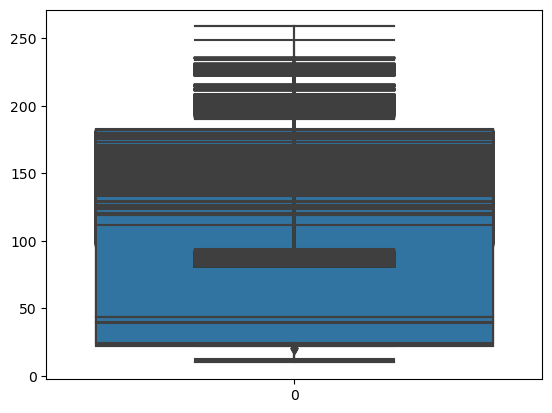

In [10]:
cs6512 = CS6512Assignment2()

s3Utils = S3Utils(bucket_name=s3bucket_name)

s3_df = s3Utils.readCsvFileFromBucket(instrument_price_file)

cs6512.execute(s3_df, crypto_currency)

cs6512.executeOnTimer(crypto_currency)


## What to deliver?

You are asked to deliver:
<ul>
<li>your solution: implemented in this notebook</li>
<li>your result files: check the <b>results</b> directory to see the file names and their structure</li>
</ul>

## A glimpse of your initial data

In [11]:
import pandas as pd

df = pd.read_csv ('./data/instrument_price.csv')
df.head(10)

instrument_ticker currency_code          bid        offer  \
0              LINK           USD     18.08329     18.08329   
1               BTC           USD  43821.37500  43821.37500   
2               LTC           USD    138.06000    138.06000   
3               DAI           USD      1.01890      1.01890   
4               XRP           USD      0.87150      0.87150   
5               SOL           USD    111.41500    111.41500   
6               BTC           USD  43916.90000  43916.90000   
7               XRP           USD      0.87188      0.87188   
8               BTC           USD  43819.80000  43819.80000   
9               USD           CAD      1.26800      1.26800   

  pricing_source_code            time  
0              KRAKEN  2/10/2022 6:31  
1            COINBASE  2/10/2022 6:31  
2              KRAKEN  2/10/2022 6:31  
3             BINANCE  2/10/2022 6:31  
4             BINANCE  2/10/2022 6:01  
5            COINBASE  2/10/2022 6:31  
6              KRAKEN  2/10/2022 6:01  
7              KRAKEN  2/10/2022 6:01  
8              KRAKEN  2/10/2022 6:31  
9        BANKOFCANADA  2/10/2022 5:31

In [12]:
dfCurrency = df.loc[df['instrument_ticker'] == 'SOL']

In [13]:
dfCurrency['offer'].describe()

count    11371.000000
mean       143.432384
std         34.494024
min         81.600000
25%        111.790000
50%        143.605000
75%        175.230000
max        235.180000
Name: offer, dtype: float64